## Overview

The Digits dataset consists of 1,797 images of handwritten digits, each represented by a 64-dimensional feature vector. The dataset's high dimensionality can pose challenges when visualising and exploring it and could also lead to model complexity.

## Import libraries 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import grid


from sklearn.datasets import load_digits

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report


## Load and prepare dataset

In [56]:
# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**let's transform the standardised dataset by applying PCA, To reduce the dataset's dimensionality.**



**X have 64 features, we need to reduce features .**

In [96]:
xpoints,ypoints  = [],[]
for i in [.80,.85,.90,.95]:
    
    e = PCA(i)
    e.fit_transform(X_scaled,y)
    n_components_ = e.n_components_
    
    print(round(e.explained_variance_ratio_.sum()*100, 1),
        "% of variance explained by",
        e.n_components_,
        "components.")
    
    xpoints.append((n_components_))
    ypoints.append((i))

80.7 % of variance explained by 21 components.
85.1 % of variance explained by 25 components.
90.0 % of variance explained by 31 components.
95.1 % of variance explained by 40 components.


**Visual for how mush effective features**

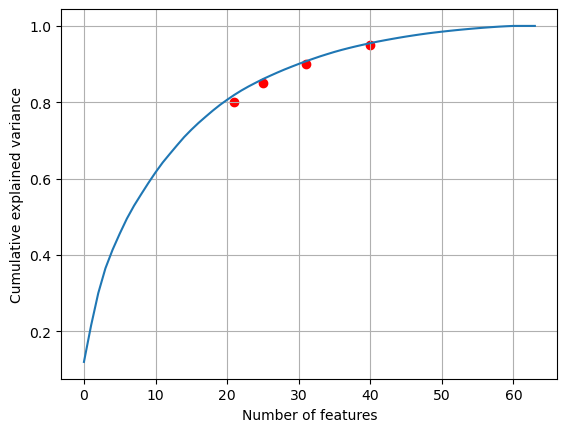

In [98]:
pca = PCA()
comp = pca.fit_transform(X_scaled,y)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.scatter(xpoints,ypoints,c='red')
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')
plt.show()

**Based on the results 25 components are needed to capture at least 85% of the total variance.**

In [99]:
pca = PCA(n_components=25)
features = pca.fit_transform(X_scaled,y)
X_rda = pd.DataFrame(data=features)

#### select best hyperparameter

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X_rda, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5],  # Only relevant for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5, 1.0]  # Only relevant for 'poly' and 'sigmoid' kernels
}

model = SVC()
grid = GridSearchCV(model,param_grid,cv=5,n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# Evaluate the best model on the test set
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Best parameters found: {'C': 10, 'coef0': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validation score: 0.9846956058846302
Test set score: 0.9888888888888889


we can see best param is :{'C': 10, 'coef0': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}.

it do excellent in cross-val & test


#### traning model
 --- 


In [43]:
# set grid params
model.set_params(**grid.best_params_)
model.fit(X_train,y_train)
ypred = model.predict(X_test)

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       1.00      0.98      0.99        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.97      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



we can see most f1 score is 1 that is mean model bais and variance is good
and data was balanced

---

👏 lets test model with my hands.

[6]


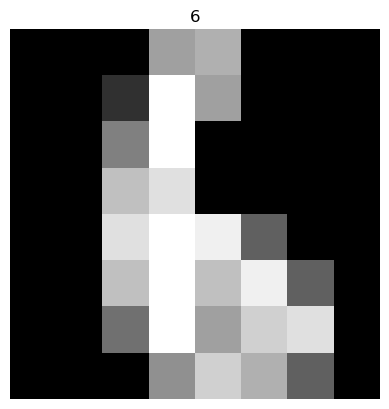

In [65]:
number = 88
image = X[number]

image_scaled = scaler.transform(image.reshape(1, -1))
num_predict = model.transform(image_scaled)
print(model.predict(num_predict))
plt.imshow(image.reshape(8,8), cmap='gray')  
plt.title(f"{y[number]}")
plt.axis('off') 
plt.show()